In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')  #seaborn 스타일로 matplotlib을 사용
sns.set(font_scale=2.5)

import missingno as msno  #null data를 쉽게 볼 수 있게 해줌

import warnings
warnings.filterwarnings('ignore')  #warning들을 무시

#창을 이용하지 않고 노트북에서 바로 확인을 하도록
%matplotlib inline 

In [11]:
df_train= pd.read_csv('train.csv')
df_test= pd.read_csv('test.csv')

#'pd.read_~'같이 생긴 많은 꼴이 존재한다.

# 1. 데이터 세트를 체크

In [12]:
df_train.head(8)  #default값은 5개만 보여준다.

#어떤 특성이 있는지 확인
#각 특성의 값들을 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [13]:
df_train.describe()  #수치형 
#몇 개의 영역에서 값이 빠져 있음

#'df_train.~'같은 메서드가 굉장히 많이 존재

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df_train.shape

(891, 12)

In [15]:
df_test.describe()    #Survied가 빠져있다.

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [16]:
df_test.shape  #열의 수가 하나 적은 이유는 target 특성이 빠져있기 때문

(418, 11)

In [17]:
df_train.columns  #특성의 종류
#print(type(df_train.columns))

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
for col in df_train.columns:
    msg= "column: {0:>10}\t Percent of NaN value: {1:.2f}%".format(col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [19]:
type(df_train[col])  #pandas의 series 타입(index와 value로 구성)

#이것들이 모여 data frame을 만드는 것이다.

pandas.core.series.Series

In [20]:
df_train[col].isnull()  #nan이 있는 곳을 True, 나머지 False
#print(type(df_train[col].isnull()))    

#이것의 타입은 series이다.

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [21]:
df_train[col].isnull().sum()  #True는 1, False는 0

2

In [22]:
True + False # = 1

1

In [23]:
df_train[col].shape  #차원을 리턴(튜플)

(891,)

In [24]:
df_train[col].shape[0]  #튜플의 값에 접근

891

In [25]:
for col in df_train.columns:
    msg= "column: {:>10}\t Percent of NaN value: {:.2f}%".format(col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


<AxesSubplot:>

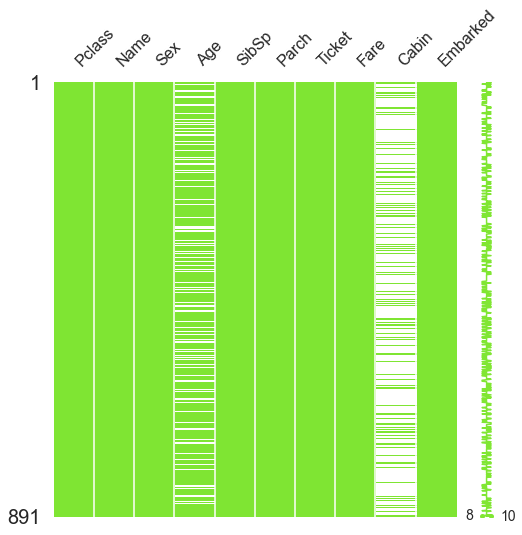

In [26]:
msno.matrix(df=df_train.iloc[:,2:], figsize=(8,8), color=(0.5, 0.9, 0.2))

#df= df_train.iloc은 전체 데이터 프레임에서 가지고 오고 싶은 부분을 새로운 데이터 프레임으로 해서 가져온다.
#figsize는 밑에 그려진 것의 크기를 정해주는 것
#color은 밑에 그려지는 것의 색을 결정

#null data의 분포를 볼 수 있다.

In [27]:
print(type(df_train.iloc[:,1:2]))    #이것의 타입은 데이터 프레임
print(type(df_train.iloc[:,1]))      #이것의 타입은 시리즈

#같은 데이터를 가리키지만 자료형이 다르다.
#즉, iloc을 사용하면 필요한 자료형을 선택하여 사용할 수 있는 장점이 있다.

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [28]:
df_train.iloc[:3,:]  #내가 원하는 row과 column에 있는 데이터 프레임을 가져오는 메서드

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [29]:
type(df_train.iloc[:,1])

#이것의 타입은 시리즈이다.

pandas.core.series.Series

In [30]:
print(type(df_train.iloc[:,5:6]))
print(type(df_train.iloc[:,5]))

#보다시피 둘은 타입이 다르다.

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


<AxesSubplot:>

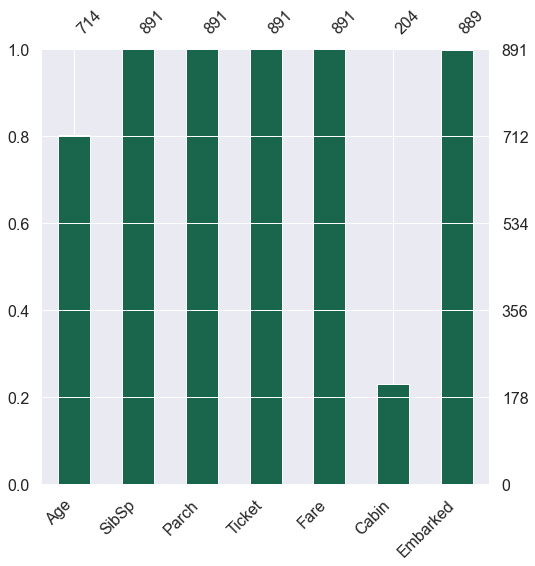

In [31]:
msno.bar(df=df_train.iloc[:,5:], figsize= (8,8), color= (0.1, 0.4, 0.3)) 

#직접적인 퍼센트를 볼 수 있다는 장점이 있다.

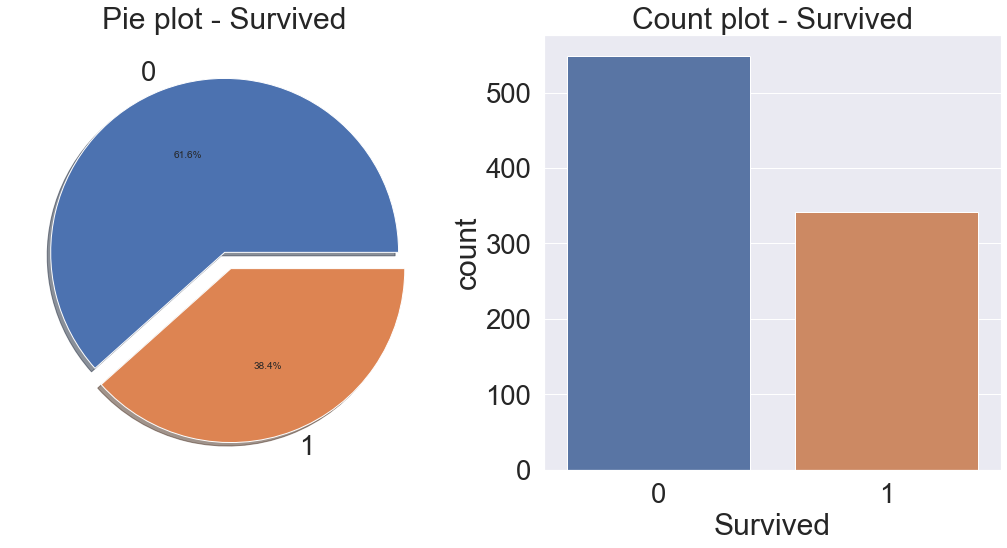

In [32]:
#target label이 어떤 분포를 갖는지 확인해야함 --> 모델, 모델 평가 방법

f, ax = plt.subplots(1, 2, figsize=(18,8))  #도화지를 준비하는 과정

df_train['Survived'].value_counts().plot.pie(explode= [0, 0.1], autopct= '%1.1f%%', ax= ax[0], shadow= True)
# df_train['Survived'].value_counts()는 시리즈를 반환한다.
# 시리즈 타입에는 plot 메서드가 있고 plot.pie() 메서드도 존재한다.
# explode는 경계 부분을 띄어준다.
# 여기서 autopct는 pie 안에 어떠한 숫자를 써주는 듯
#ax= ax[0]은 ax 도화지에서 첫번째 부분에 그리겠다는 의미
#shadow는 밑에 살짝 보이는 그림자를 보여줌

ax[0].set_title('Pie plot - Survived')  #첫번째 도화지에 이름을 붙임
ax[0].set_ylabel('')  #아무것도 넣지 않음(default는 'Survived'가 들어간다.)

sns.countplot('Survived', data= df_train, ax= ax[1])  #가장 먼저 column의 이름을 넣어준다. 그 다음 데이터 프레임을 넣어준다. 도화지의 두번째 파트에 넣는다.
ax[1].set_title('Count plot - Survived')
plt.show()

#데이터가 balanced하다는 것을 알 수 있다.
#그림을 잘 그리는 것은 매우 중요하다.

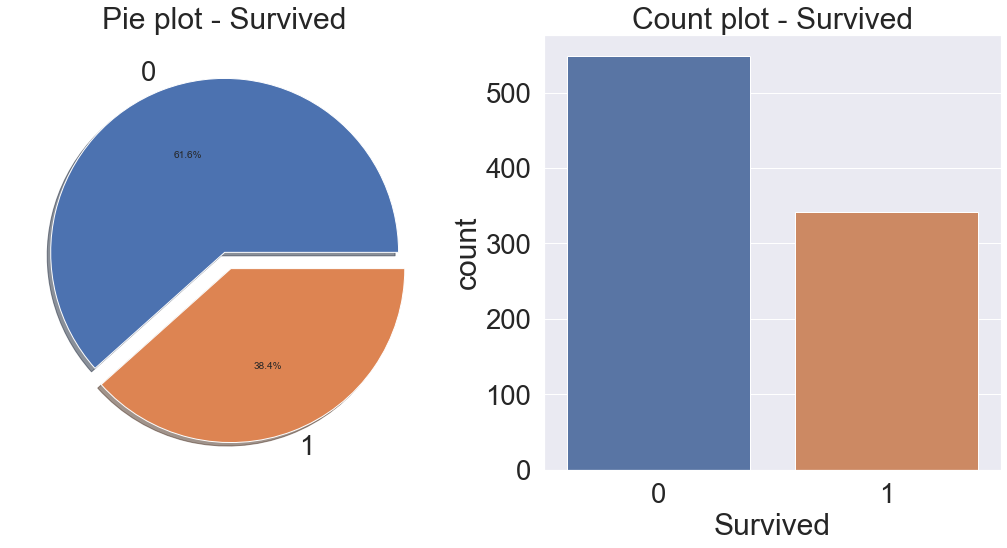

In [33]:
f
#f는 도화지 차레를 출력해주는구나(도화지 위에 뭐가 그려져있든 없든 상관없이...)

In [34]:
type(df_train['Survived'].value_counts())  #시리즈 타입이다.

pandas.core.series.Series

<AxesSubplot:>

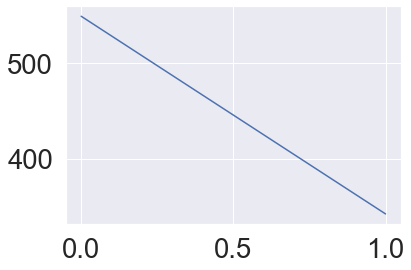

In [35]:
df_train['Survived'].value_counts().plot()  #시리즈 타입은 plot이라는 메서드를 갖고 있다.

<AxesSubplot:ylabel='Survived'>

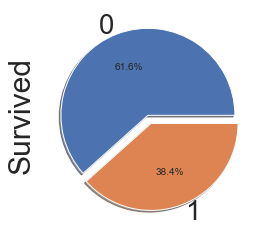

In [36]:
df_train['Survived'].value_counts().plot.pie(explode= [0, 0.1], autopct= '%1.1f%%', shadow= True)

In [37]:
type(df_train['Survived'].value_counts())  #시리즈 타입임을 알 수 있다

pandas.core.series.Series

In [38]:
ax  #두가지 요소로 되어있음

array([<AxesSubplot:title={'center':'Pie plot - Survived'}>,
       <AxesSubplot:title={'center':'Count plot - Survived'}, xlabel='Survived', ylabel='count'>],
      dtype=object)

# 2. EDA (Exploratory Data Analysis) 탐색적 데이터 분석

In [39]:
df_test.shape  #11개의 fature가 존재한다. 인사이트를 얻을 필요가 있다.

(418, 11)

In [40]:
#그림을 통해 내가 하고자 하는 말과 내가 보고자 하는 것을 보는 능력이 중요하다.

## 2.1 Pclass

In [41]:
df_train['Pclass']  

#ordinal data (순서 자료)이다. 데이터가 속하는 category들에 순서가 있으면 Ordinal Data라고 한다.

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [42]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index= True).mean()

#생존율(평균을 이용한)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [43]:
print(type(df_train[['Pclass', 'Survived']]))
print(type(df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index= True)))
print(type(df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index= True).mean()))
print(df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().columns)
print(df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().columns)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.frame.DataFrame'>
Index(['Pclass', 'Survived'], dtype='object')
Index(['Survived'], dtype='object')


In [44]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index= True).count()

#as_index= True는 Pclass를 인덱스로 한다는 뜻
#각 Pclass에 독립적인 Survived series가 있다고 생각하자!!

,Survived
Pclass,
1,216
2,184
3,491


In [45]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).sum()

#이것의 타입은 데이터 프레임
#여러 column을 가지고 가져올 때는 list로 묶어서 가져와야한다.
#as_index는 default가 True인듯..

,Survived
Pclass,
1,136
2,87
3,119


In [46]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins= True).style.background_gradient(cmap= 'cool')

#margin=Ture라는 것은 All을 추가해 주는 것이다.
#cmap은 color map(검색을 통해 종류를 알 수 있다.)
#이것의 타입은 데이터 프레임이다.(뒤에 스타일은 빼고..)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [47]:
print(type(pd.crosstab(df_train['Pclass'], df_train['Survived'], margins= True)))
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins= True)

<class 'pandas.core.frame.DataFrame'>


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [48]:
type(df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index= True).mean())

#df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True)의 타입은 DataFrameGroupBy이다.
#df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()의 타입은 DataFrame이다.

pandas.core.frame.DataFrame

In [49]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index= True)

#Pclass를 기준으로 인덱스로 묶는다는 뜻인듯

In [50]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index= True).mean().sort_values(by= 'Survived', ascending= True)

#이것의 타입은 데이터 프레임이다.
#ascending은 한국어로 오름차순.

,Survived
Pclass,
3,0.242363
2,0.472826
1,0.629630


In [51]:
df_train.sort_values(by='Fare', ascending=True).head(500)

#보다시피 데이터 프레임에서 sort_values가 잘 적용되는 것을 볼 수 있다.
#또한 sort_values를 한다고 해서 자료형이 바뀌지 않는다.(즉, data frame으로 유지된다.)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7,G6,S
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8,NaN,S
353,354,0,3,"Arnold-Franchi, Mr. Josef",male,25.0,1,0,349237,17.8,NaN,S


<AxesSubplot:xlabel='Pclass'>

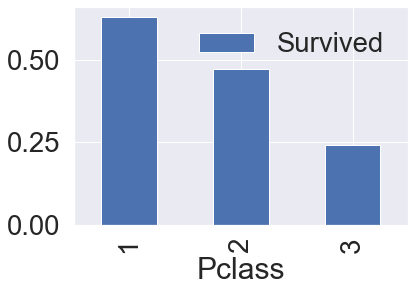

In [52]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index= True).mean().sort_values(by= 'Survived', ascending= False).plot.bar()

#bar 그래프를 이용하여 그래프를 그렸다.
#생존 여부가 0과 1로 판별되기 때문에 mean이 생존율이 되는 것이다.

#결론: Pclass가 더 좋아질수록 생존률이 높아진다.

In [53]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index= False).mean().sort_values(by= 'Survived', ascending= False)

#만약 as_index= False라면 두 개의 시리즈로 구성된 데이터 프레임이 된다.(이는 dataframe을 plot할 때 두 개의 직선이 plot되는 문제를 야기한다.)
#'.mean()'과 '.count()'같은 것들은 Pclass를 기준으로 인덱스를 나눈 후 각 인덱스에 대응하는 열의 값을 결정하는 메서드이다.(이해 완료)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [54]:
print(type(df_train['Pclass'].value_counts()))

<class 'pandas.core.series.Series'>


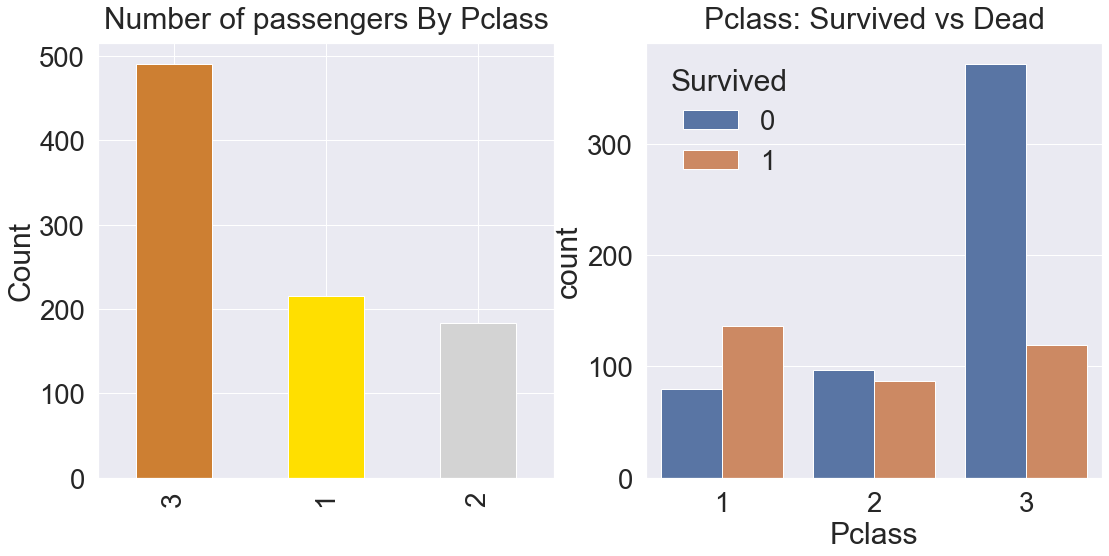

In [55]:
y_position= 1.02
f, ax= plt.subplots(1, 2, figsize= (18, 8))
df_train['Pclass'].value_counts().plot.bar(color= ['#CD7F32', '#FFDF00', '#D3D3D3'], ax= ax[0])
ax[0].set_title('Number of passengers By Pclass', y= y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue= 'Survived', data= df_train, ax= ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y= y_position)
plt.show()

In [56]:
df_train['Pclass'].value_counts()

#이것의 타입은 시리즈이다.

3    491
1    216
2    184
Name: Pclass, dtype: int64

## 2.2 Sex

<AxesSubplot:>

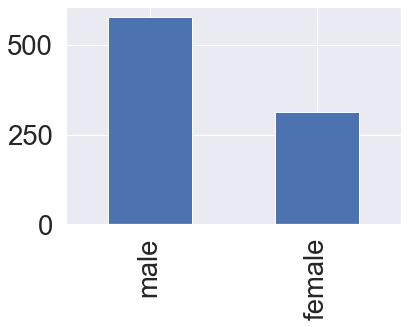

In [57]:
df_train['Sex'].value_counts().plot.bar()

#남자와 여자의 수

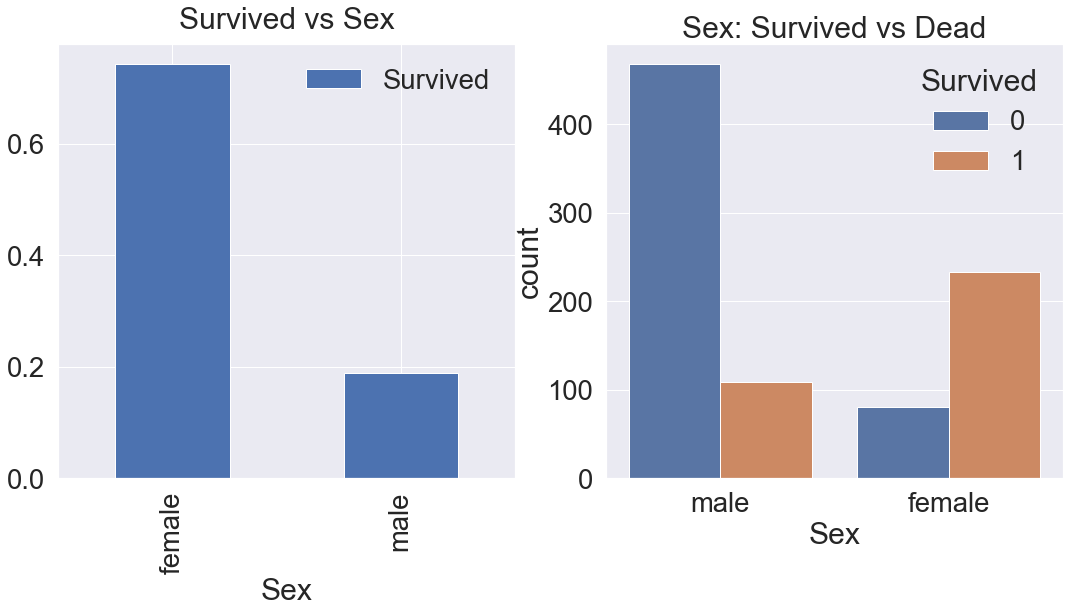

In [58]:
f, ax= plt.subplots(1, 2, figsize= (18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax= ax[0])  #생존률
ax[0].set_title('Survived vs Sex', y= y_position)
sns.countplot('Sex', hue= 'Survived', data= df_train, ax= ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [59]:
df_train[['Sex', 'Survived']]

#이것의 타입은 데이터 프레임이다.
#대괄호 안에 꼭 list 형태로 넣어줄 것!

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


In [60]:
print(type(df_train['Pclass']))      #시리즈 타입이다.
print(type(df_train[['Pclass']]))    #이렇게 시리즈가 아닌 데이터 프레임으로 뽑아올 수도 있다.

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [61]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean()

#이것의 형태는 데이터 프레임이다.

,Survived
Sex,
female,0.742038
male,0.188908


In [62]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins= True).style.background_gradient(cmap= 'summer_r')

#이것의 타입은 데이터 프레임이다.
#이 데이터 프레임의 column은 0, 1, All 총 세개이다.

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


### 2.1과 2.2 조합

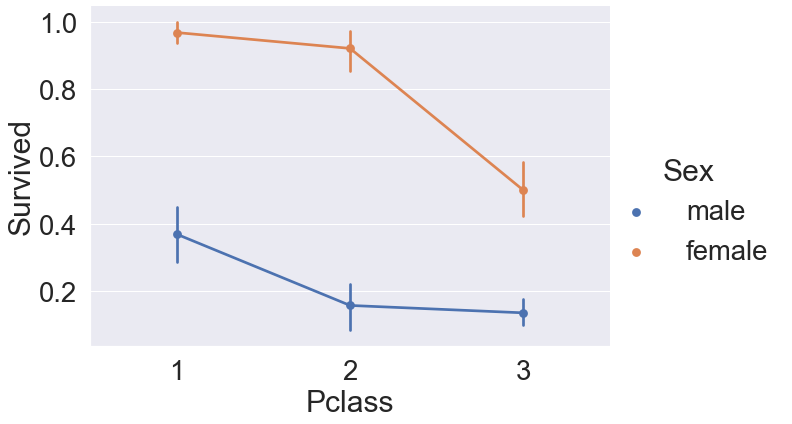

In [63]:
sns.factorplot('Pclass', 'Survived', hue= 'Sex', data= df_train, size= 6, aspect= 1.5)

(결론)

-Lady First

-Money brings Survival

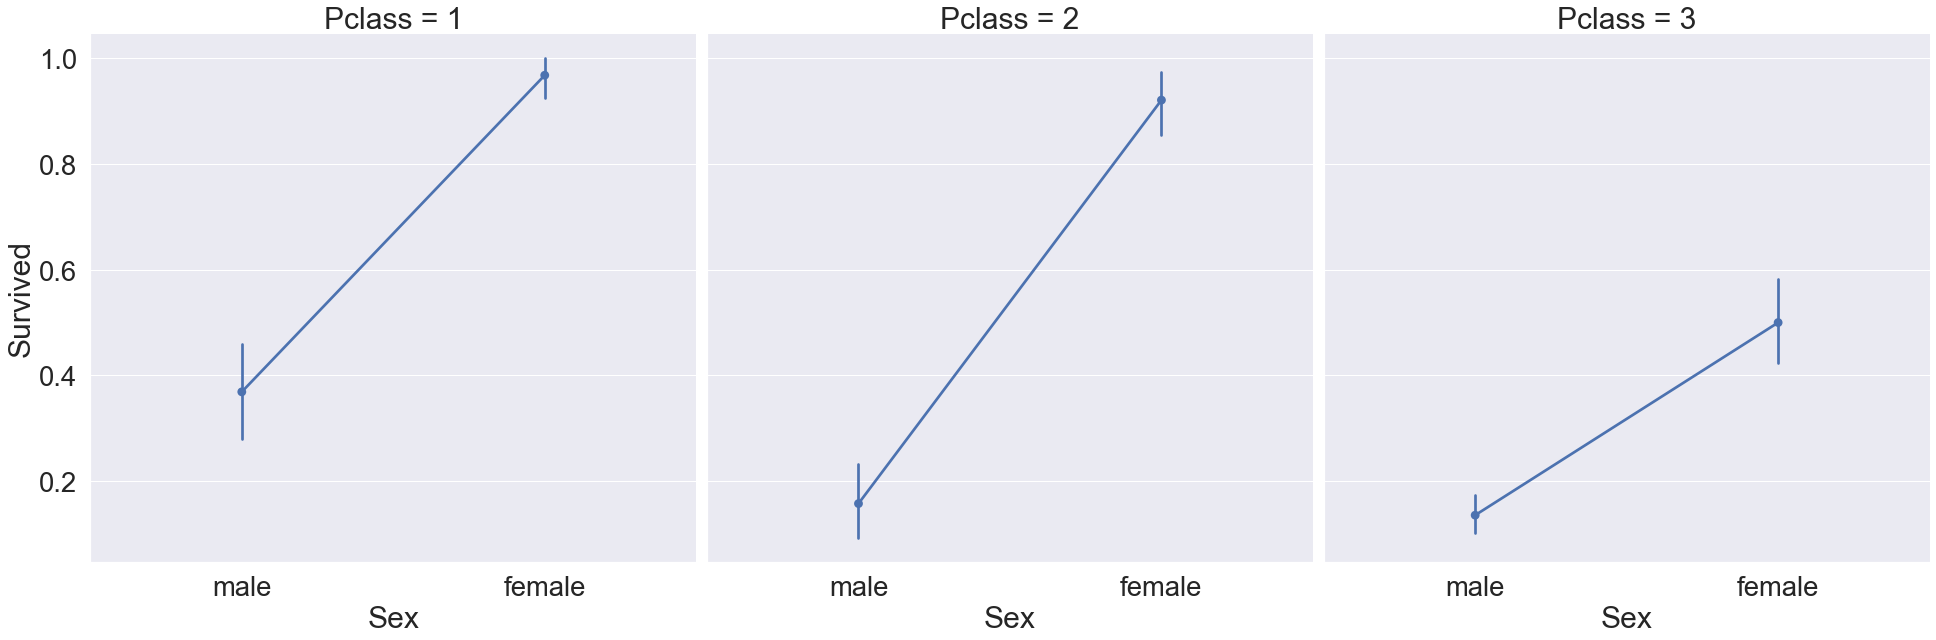

In [64]:
sns.factorplot(x= 'Sex', y= 'Survived', col= 'Pclass', data= df_train, saturation= 5,
              size= 9, aspect= 1)

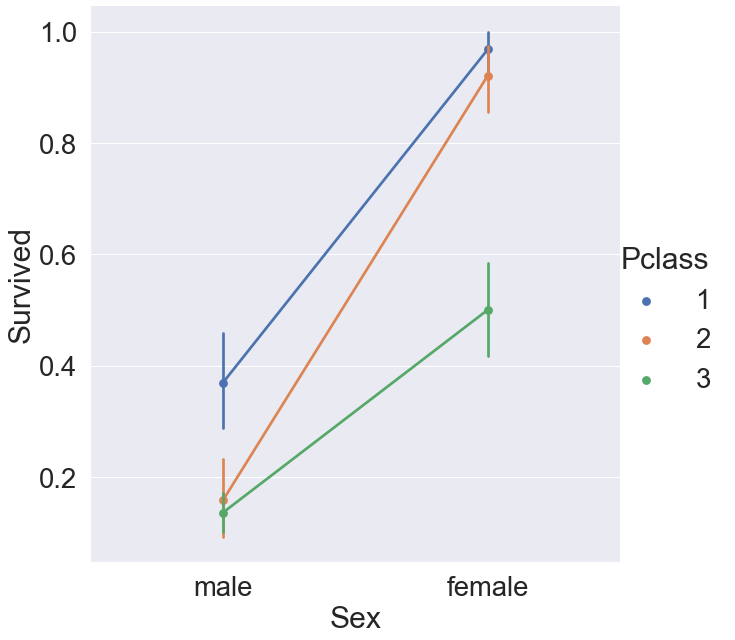

In [65]:
sns.factorplot(x= 'Sex', y= 'Survived', hue= 'Pclass', data= df_train, saturation= 5,
              size= 9, aspect= 1)

#저 x축과 수직인 직선들은 '에러 바'이다. 이는 이 수치가 얼마나 믿을만 한지에 대해 알 수 있다.

## 2.3 Age

In [66]:
print("제일 나이 많은 탑승객: {:.1f} years".format(df_train['Age'].max()))
print("제일 나이 어린 탑승객: {:.1f} years".format(df_train['Age'].min()))
print("탑승객의 평균 나이: {:.1f} years".format(df_train['Age'].mean()))

제일 나이 많은 탑승객: 80.0 years
제일 나이 어린 탑승객: 0.4 years
탑승객의 평균 나이: 29.7 years


In [67]:
df_train['Age'].min()

#뒤에 올 수 있는 메서드가 매우 많다.

0.42

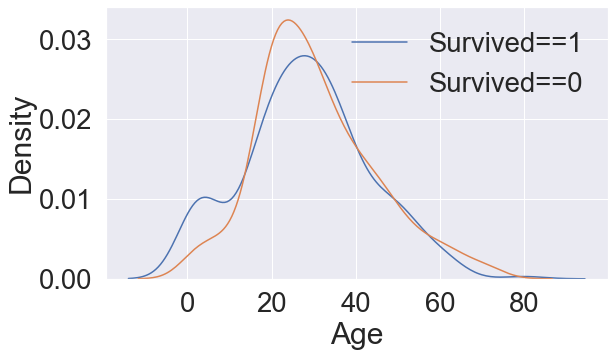

In [68]:
fig, ax = plt.subplots(1, 1, figsize= (9, 5))  #도화지 한 칸을 내가 원하는 크기로 만들 수 있다.
sns.kdeplot(df_train[df_train['Survived']== 1]['Age'], ax= ax)
sns.kdeplot(df_train[df_train['Survived']== 0]['Age'], ax= ax)
plt.legend(['Survived==1', 'Survived==0'])
plt.show()

#kde는 커널밀도추정..딱딱한 히스토그램을 부드럽게 만들어 준다.
#앞에서 본 두가지 feature와는 다른 수치형 데이터이므로 다른 plot을 사용하는 것 같다.

#여기서는 절대적인 값보다 생존과 죽음간의 비율이 중요하다.
#(결론) 나이가 어린 사람들이 생존율이 높다.

In [69]:
df_train[df_train['Survived']== 1]  #True를 갖는 인덱스만을 행으로 선택한 데이터 프레임

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [70]:
df_train['Survived']== 1

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

<AxesSubplot:>

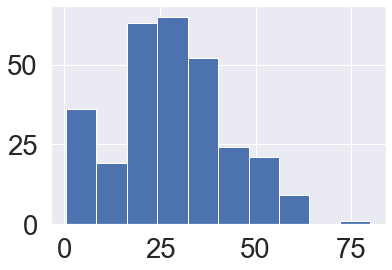

In [71]:
df_train[df_train['Survived']== 1]['Age'].hist()

#히스토그램은 범위를 나누어 각 범위에 존재하는 데이터를 카운트하여 데이터의 분포를 알아보는 방법이다.

In [72]:
df_train.iloc[1:3,:]

#iloc을 이용한 데이터 프레임 인덱싱

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [73]:
for row in df_train.iterrows():
    print(row)
    print()
    print(type(row))  #튜플을 반환한다. 첫번째 요소는 아마 인덱스이고, 두번째는 특성(feature)값들을 갖는 시리즈이다.
    print()
    print(row[0])
    print()
    print(row[1])
    print()
    print(type(row[1]))  #두번째 요소는 시리즈 타입이다.
    break
    
#df_train.iterrows()는 행들을 하나씩 주는 이터레이션이다.

(0, PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object)

<class 'tuple'>

0

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype:

In [74]:
df_train[df_train['Survived']== 1]

#특정 특성에서 특정 조건을 만족하는 데이터만 골라내는 방법이다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


## Pclass, Sex, Age

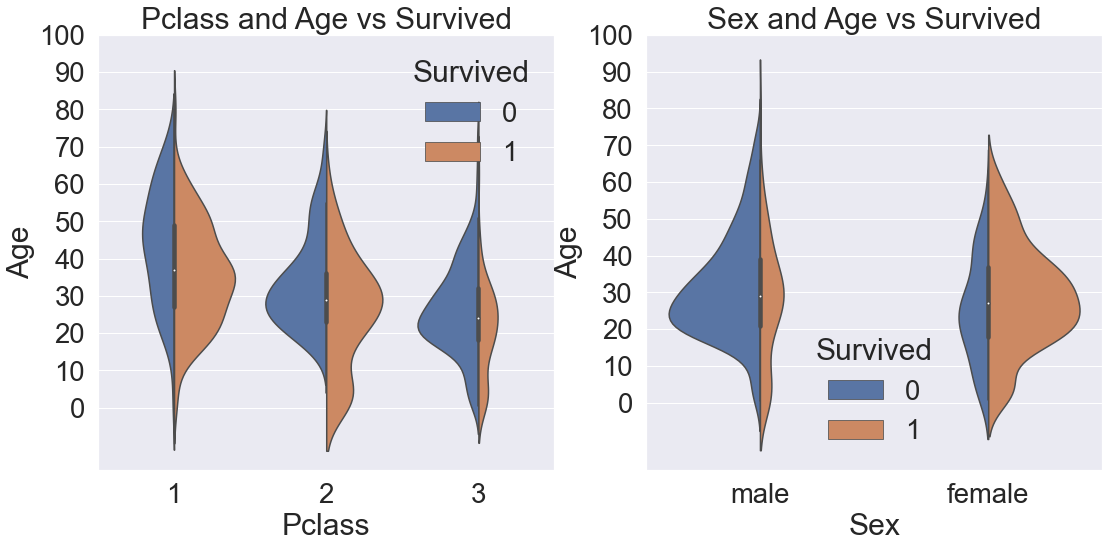

In [75]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

#수치형 데이터인 Age를 y축에 놔두었다.

#sns.violinplot은 아래처럼 분포를 보여주는 방법이다. 한 번에 여러가지 자료를 볼 수 있다는 장점이 있다.
#scale은 분포를 어떤 식으로 그릴지 결정하는 매개변수이다. scale='count'이면 실제 개수로 분포를 그리고, scale='area'이면 실제 개수가 아닌 반대편가 크기가 같도록 분포를 그린다.
#split=True는 아래처럼 한 수직선을 기준으로 서로 다른 분포를 그리고, split=False는 한 수직선을 기준으로 서로 대칭인 같은 분포를 그리고 대신에 두 개를 그린다.

## 2.4 Embarked

<AxesSubplot:xlabel='Embarked'>

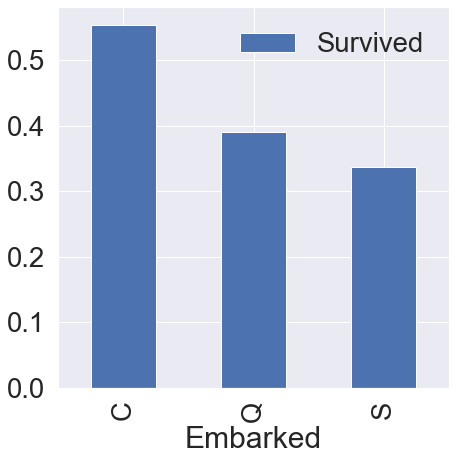

In [76]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

# ascending은 오름차순을 의미

#조금의 차이는 있지만 비슷하기는 하다. 그래도 이 정도의 차이를 준다면 좋은 feature가 될 수 있으니 사용한다.

In [77]:
df_train[['Embarked', 'Survived']]

,Embarked,Survived
0,S,0
1,C,1
2,S,1
3,S,1
4,S,0
...,...,...
886,S,0
887,S,1
888,S,0
889,C,1


In [78]:
print(type(df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean()))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean()

<class 'pandas.core.frame.DataFrame'>


,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [79]:
print(type(df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=True)))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=True)

#value인 'Survived'열을 기준으로 sorting한 것

<class 'pandas.core.frame.DataFrame'>


,Survived
Embarked,
S,0.336957
Q,0.389610
C,0.553571


In [80]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_index(ascending=True)

#index인 Embarked를 기준으로 sorting한 것

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


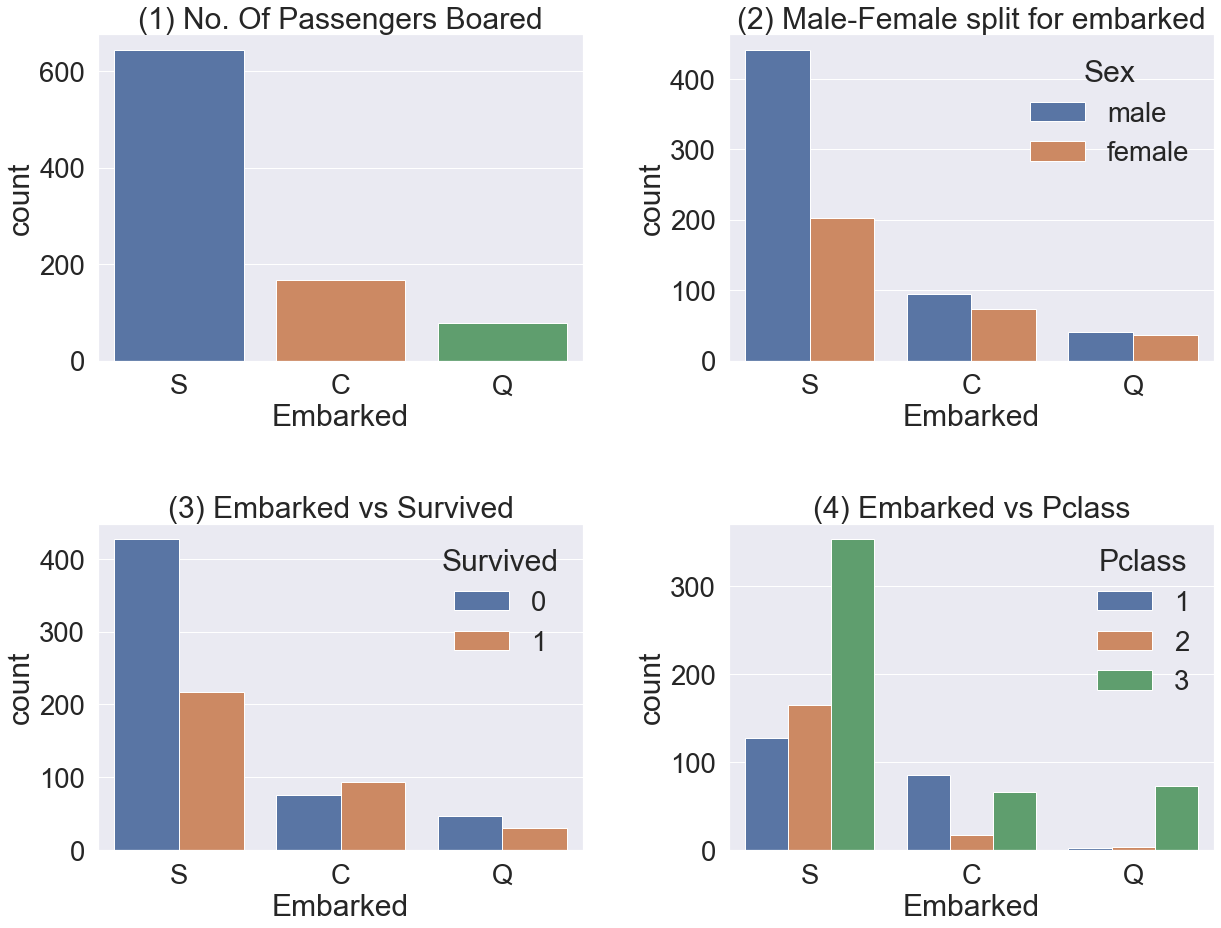

In [81]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title('(1) No. Of Passengers Boared')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0, 1].set_title('(2) Male-Female split for embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1, 0])
ax[1, 0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1, 1])
ax[1, 1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.3, hspace=0.5)    #보기 좋도록 유지되는 간격을 정해준다.

plt.show()

Embarked C에서는 여성의 비율이 높고 Pclass가 1인 사람의 비율이 높으니 Embarked C의 생존율이 높은 것이다.

여기서 주의할 것은 상대적인 수인 생존률을 사용한다는 것이다.

[]

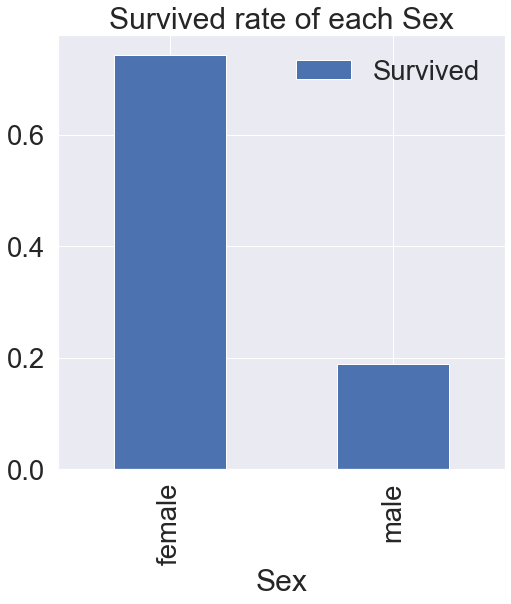

In [82]:
f,ax = plt.subplots(1, 1, figsize=(8, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)
ax.set_title('Survived rate of each Sex')
plt.plot()

## 2.5 Family - SibSp + Parch

In [83]:
df_train["FamilySize"] = df_train['SibSp'] + df_train['Parch'] + 1

#시리즈의 합으로 새로운 feature을 만들 수 있다.
#마지막에 더하는 +1은 본인을 가족의 수에 추가한 것이다.

In [84]:
df_train

#마지막 feature을 보면 FamliySize feature가 늘어난 것을 알 수 있다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [85]:
print('Maximum size of Family:', df_train['FamilySize'].max())
print('Minimum size of Family:', df_train['FamilySize'].min())

#FamilySize의 max값과 min값을 알아본다.
#범위가 그리 넓지 않고 정수형이니 countplot을 사용하여 봐도 좋을듯

Maximum size of Family: 11
Minimum size of Family: 1


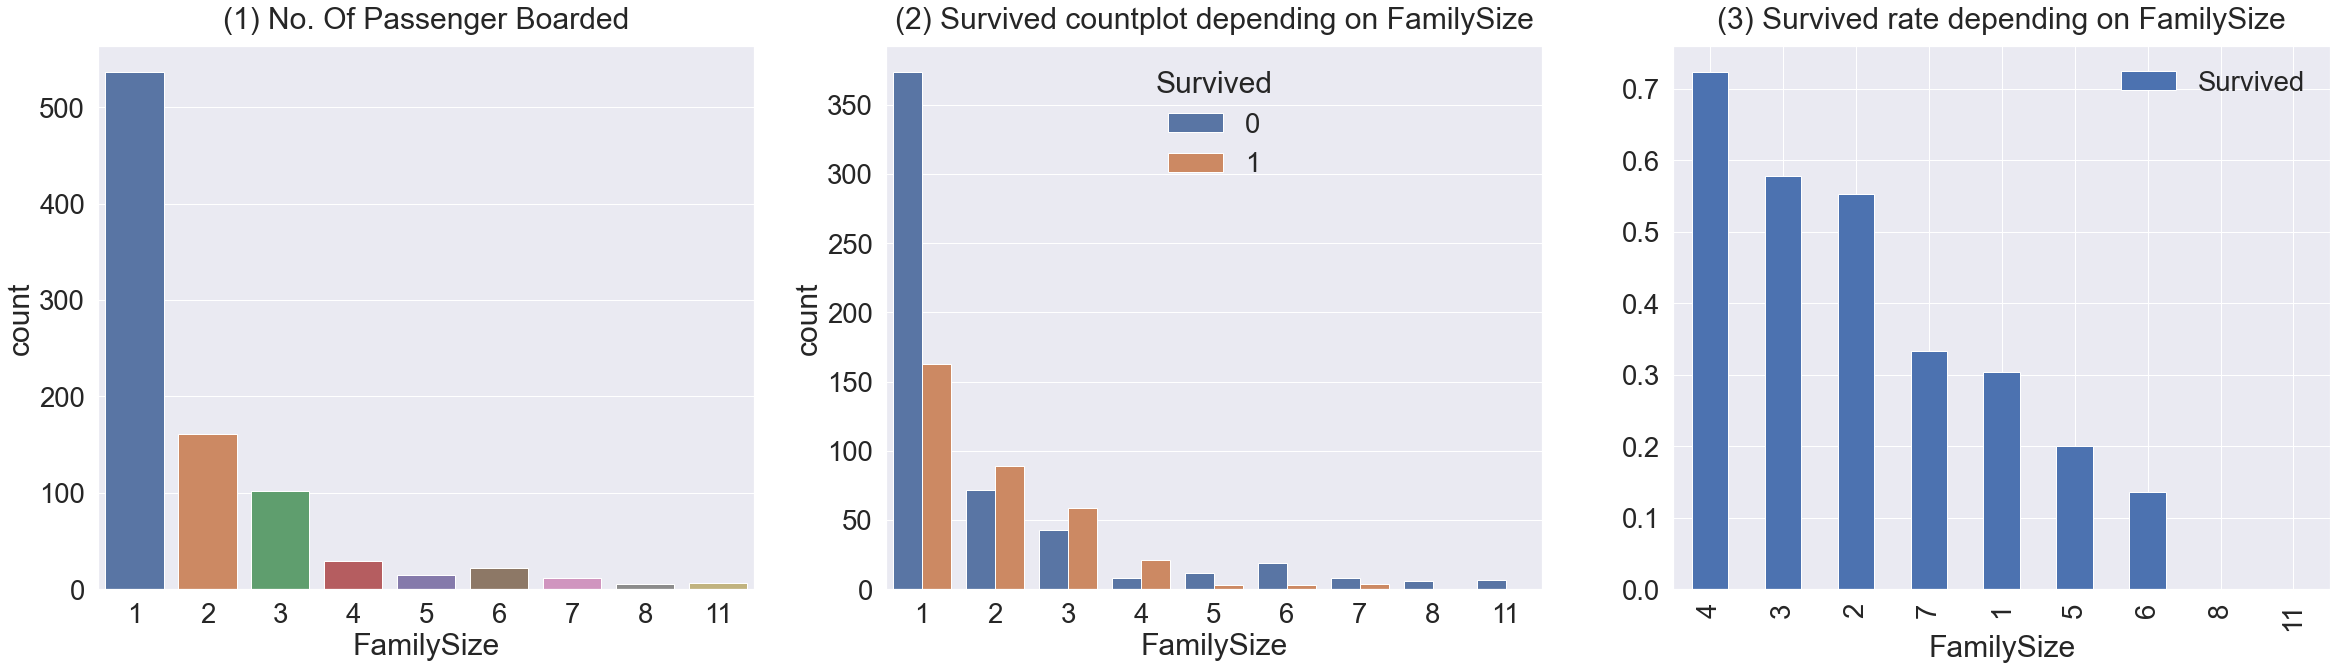

In [86]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))

sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passenger Boarded', y=1.02)

sns.countplot('FamilySize', data=df_train, hue='Survived', ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

#결론: 너무 많아도 너무 적어도 (생존에)좋지 않다.
#추측을 해보면 적당한 크기의 가족 단위가 분담을 잘하고 잘 챙겨줘서 생존율을 높은 것 같다.

In [87]:
df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived')

,Survived
FamilySize,
8,0.000000
11,0.000000
6,0.136364
5,0.200000
1,0.303538
7,0.333333
2,0.552795
3,0.578431
4,0.724138


## 2.6 Fare

In [88]:
df_train

#Fare는 탑승 요금이며 continuous feature이다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


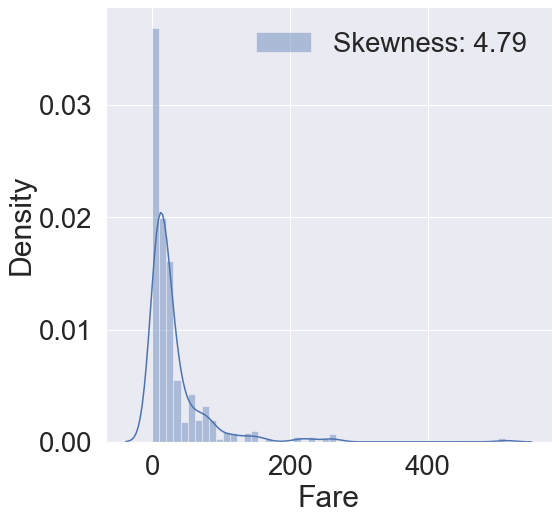

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

#distplot은 distribution plot이다.
#distplot에서 kde=False라고 지정하면 매끄러운 선이 없어진다.
#distplot은 kdeplot과 매우 유사한거 같다.

#label은 legend를 해줘야 나타나는듯..근데 정확히 무얼 의미하는 것일까..

#skewness는 얼마나 distribution이 얼마나 쏠렸나, 비대칭이나 알려주는 값이다.
#skewness가 높으면 문제가 생긴다..왜?

#여기서는 이 skewness를 해결하기 위하여 log를 씌어준다.

### 참고

Skewed 데이터를 변환하는 이유는 꼬리에 있는 값을 모델에 제대로 학습시키기 위함이다. Skewed 되어있는 값을 그대로 학습시키면 꼬리 부분이 상대적으로 적고 멀어서 모델에 영향이 거의 없이 학습된다. 만약 꼬리 부분도 노이즈가 아닌 정말 유의미한 데이터이면 꼬리 부분에 해당하는 test 데이터는 예측력이 낮아진다.
변환을 해서 들어가게 되면 그만큼 데이터의 중간값(or 평균값)가 tail 하고 가까워져서 모델에 보다 크게 들어간다. 그렇게 되면 꼬리 쪽에 해당하는 test 데이터가 들어와도 예측력이 높아진다.

Skew 데이터를 변환하는 방법으론 square root, cube root, log, outlier 제거 등이 있다.
  Positive skewed(right skewed) 변환방법 : square root, cube, log
  Negative skewed(left skewed) 변환방법 : square, cube root, logarithmic.
  (위의 log는 밑이 10인 것을 의미하고 logarithmic은 밑이 2인 것을 의미)



출처: https://rucrazia.tistory.com/65 [Rucrazia's Blog]

In [90]:
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)

#log값을 모든 'Fare'에 대해 적용

#특정 시리즈의 value들에 동일한 operation을 적용하고 싶을 경우 map과 apply(?)를 사용하면 된다.

#이것이 feauture engineering이다.

In [91]:
x = lambda i: i*i
# ':'을 기준으로 왼쪽이 input이고 오른쪽이 output이라고 보면 될듯
print(x(3))

9


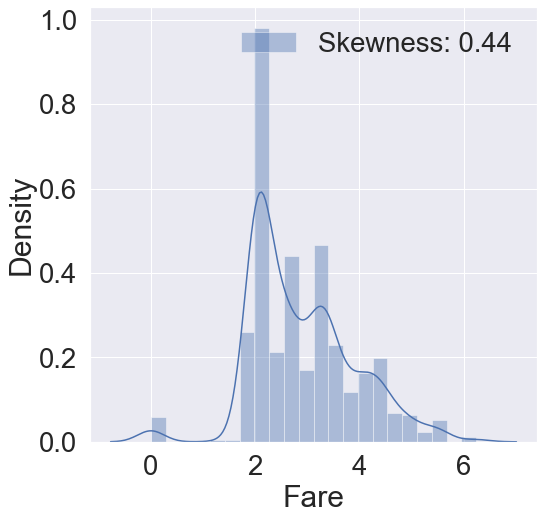

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

#feature engineering을 한 후 (skewness를 줄여준 후) 다시 distplot을 사용한 것이다.

## 2.7 Cabin

Cabin feature은 Null data의 비중이 너무 높기 때문에 data에서 빼준다.

## 2.8 Ticket

In [93]:
df_train['Ticket'].value_counts().head(20)

#너무 다양한 문자열들이 존재...어떻게 정보를 꺼낼까??

#아이디어가 필요하다.
#공통된 것이 눈으로 보인다.
#직접 보고 추측해가며 새로운 feature을 만들 수 있겠다..(feature engineering)

#그러나 일단 빼고 사용하겠다.(나중에 더 만져서 accuracy를 늘려보자!)

347082          7
CA. 2343        7
1601            7
3101295         6
CA 2144         6
347088          6
S.O.C. 14879    5
382652          5
LINE            4
PC 17757        4
17421           4
349909          4
113760          4
4133            4
113781          4
W./C. 6608      4
2666            4
19950           4
347077          4
C.A. 31921      3
Name: Ticket, dtype: int64

## EDA 완료
 feature마다 어떤 distribution을 갖고, 어떤 통계적인 모양을 갖고 있고, target label과 어떤 연관성을 갖고 있고, 어떤 feature가 중요한지 알게 되었고, 어떤 feature을 뺄지 알게되었다.
 
 여러 라이브러리를 이용하여 EDA를 진행하였다.

# 3. Feature Engineering

feature engineering은 train set뿐만 아니라 test set에 대해서도 적용해야 한다.

## 3.1 Fill Null in Age feature

In [94]:
df_train['Age'].isnull().sum()

177

In [95]:
df_train['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [96]:
df_train['Initial'] = df_train['Name'].str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test['Name'].str.extract('([A-Za-z]+)\.')

#Name에 있는 정보를 이용하여 Age의 Null 부분을 채울 수 있다.

#시리즈에 .str을 붙이면 모든것이 String으로 바뀐다.(정규 표현식을 사용하기 위해 변환하는 것이다.)
#그 후 정규 표현식을 사용한다.(extract를 사용한다.)

In [97]:
df_train

#새로운 feature인 Initial이 생긴 것을 알 수 있다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,2.564949,NaN,S,1,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,3.401197,B42,S,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,3.154870,NaN,S,4,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,3.401197,C148,C,1,Mr


In [98]:
pd.crosstab(df_train['Initial'], df_train['Sex'])

Sex,female,male
Initial,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [99]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

#.T는 transpose를 시켜준다.

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [100]:
df_train['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
                           ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Miss'], inplace=True)

df_test['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
                           ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Miss'], inplace=True)


df_train['Initial'].head(10)

#replace를 사용하여 직접 매핑시킨다.
#하나 하나 검색하여 더 큰 단위로 분류시킨다.

#'inplace=True'라고 적어야 실제 df_trian 자체의 값이 바뀐다.

#df_test에 대해서도 적용해 줘야한다.

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Initial, dtype: object

In [101]:
df_train.groupby(['Initial']).mean()

#앞에서와 다르게 전체 프레임에 대해 groupby를 사용하였으므로 Initial을 기준으로 나눈 후 모든 feature에 대한 정보가 나온다.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


<AxesSubplot:xlabel='Initial'>

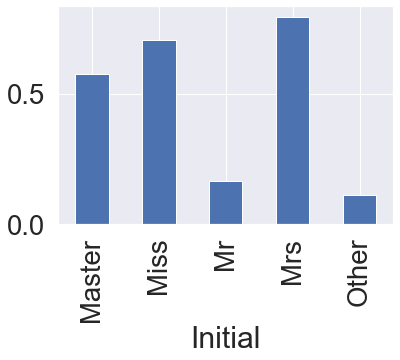

In [102]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

<AxesSubplot:xlabel='Initial'>

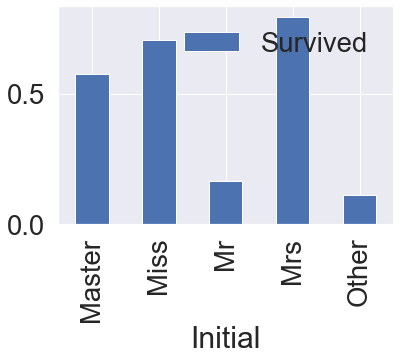

In [103]:
df_train[['Initial', 'Survived']].groupby(['Initial']).mean().plot.bar()

In [104]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Mr'), 'Age'] = 33

#iloc은 intger location의 약자이고, 데이터 프레임의 행이나 열의 순서를 나타내는 정수로 특정 값을 추출해 오는 방식이다.
#loc은 열의 이름을 직접 적어주거나 특정 조건식을 적음으로써 사람이 읽기 좋은 방법으로 데이터에 접근하는 방식이다.

he or and and python statements require truth-values. For pandas these are considered ambiguous so you should use "bitwise" | (or) or & (and) operations

https://stackoverflow.com/questions/36921951/truth-value-of-a-series-is-ambiguous-use-a-empty-a-bool-a-item-a-any-o

In [105]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Mr'), 'Age'] = 33
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Mrs'), 'Age'] = 36
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Master'), 'Age'] = 5
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Miss'), 'Age'] = 22
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial']=='Other'), 'Age'] = 46

In [106]:
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial']=='Mr'), 'Age'] = 33
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial']=='Mrs'), 'Age'] = 36
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial']=='Master'), 'Age'] = 5
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial']=='Miss'), 'Age'] = 22
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial']=='Other'), 'Age'] = 46

#여기서 주의할 점은 test set의 Null data를 채워넣어줄 때 train data를 기반으로 해서 넣어줘야한다.
#왜냐하면 test data는 사용하면 안되기 때문이다.
#test data는 변환은 해도되지만 이용은 하면 안된다고 생각하자..말 그대로 test를 하기 위한 용도로만 사용할 것..!

#iloc은 일부를 data frame의 일부를 아예 떼어오는 것이 아닌듯...왜냐하면 iloc으로 값을 바꿔줬는데 전체 data frame의 값이 바뀌었다..

In [107]:
df_train.loc[df_train['Age'].isnull(), :]

#보다 싶이 모든 Age의 Null 값이 사라진 것을 볼 수 있다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial


Null 데이터를 잘 채우는 것은 매우 매우 중요하다..!!

## 3.2 Fill Null in Embarked and categorize Age  

In [108]:
df_train['Embarked'].isnull().sum()

#전체에 비해 매우 적음

2

In [109]:
df_train.shape

(891, 14)

In [110]:
df_train['Embarked'].fillna('S', inplace=True)

#앞에서 S가 가장 많았음을 확인하였다.
#null이 매우 적으므로 가장 많이 나온 것으로 대체한다.

In [111]:
df_train['Embarked'].isnull().sum()

0

In [112]:
df_train['Age_cat'] = 0

In [113]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,0


In [114]:
df_train.loc[df_train['Age']<10, 'Age_cat'] = 0
df_train.loc[(10<=df_train['Age']) & (df_train['Age']<20), 'Age_cat'] = 1
df_train.loc[(20<=df_train['Age']) & (df_train['Age']<30), 'Age_cat'] = 2
df_train.loc[(30<=df_train['Age']) & (df_train['Age']<40), 'Age_cat'] = 3
df_train.loc[(40<=df_train['Age']) & (df_train['Age']<50), 'Age_cat'] = 4
df_train.loc[(50<=df_train['Age']) & (df_train['Age']<60), 'Age_cat'] = 5
df_train.loc[(60<=df_train['Age']) & (df_train['Age']<70), 'Age_cat'] = 6
df_train.loc[(70<=df_train['Age']), 'Age_cat'] = 7

In [115]:
df_test.loc[df_test['Age']<10, 'Age_cat'] = 0
df_test.loc[(10<=df_test['Age']) & (df_test['Age']<20), 'Age_cat'] = 1
df_test.loc[(20<=df_test['Age']) & (df_test['Age']<30), 'Age_cat'] = 2
df_test.loc[(30<=df_test['Age']) & (df_test['Age']<40), 'Age_cat'] = 3
df_test.loc[(40<=df_test['Age']) & (df_test['Age']<50), 'Age_cat'] = 4
df_test.loc[(50<=df_test['Age']) & (df_test['Age']<60), 'Age_cat'] = 5
df_test.loc[(60<=df_test['Age']) & (df_test['Age']<70), 'Age_cat'] = 6
df_test.loc[(70<=df_test['Age']), 'Age_cat'] = 7

In [116]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,3


In [117]:
#위에서 하드 코딩한 것을 더 쉽게 바꿀 수 있다.
def category_age(x):
    if x<10:
        return 0
    elif x<20:
        return 1
    elif x<30:
        return 2
    elif x<40:
        return 3
    elif x<50:
        return 4
    elif x<60:
        return 5
    elif x<70:
        return 6
    else:
        return 7

In [118]:
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)
df_test['Age_cat_2'] = df_test['Age'].apply(category_age)

In [119]:
(df_train['Age_cat'] == df_train['Age_cat_2']).all()

#all()은 모두 True면 True가 나온다.

#위 두가지 방법이 똑같은 결과를 나타남을 의미

True

In [120]:
df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)
df_test.drop(['Age', 'Age_cat_2'], axis=1 , inplace=True)

In [121]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,2.085672,NaN,S,1,Mr,3


In [122]:
df_test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_cat
0,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,NaN,Q,Mr,3.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,NaN,S,Mrs,4.0
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,NaN,Q,Mr,6.0
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,NaN,S,Mr,2.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,NaN,S,Mrs,2.0


## 3.3 Change string to categorical and Pearson coefficient

In [123]:
df_train['Initial'].unique()

#feature가 무엇들로 이루어져 있는지 보여준다.

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [124]:
df_train['Initial'] = df_train['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})
df_test['Initial'] = df_test['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})

#직접 하나씩 바꾸기 보다는 map 함수를 사용하여 편리하게 string data를 숫자로 바꿀 수 있다.

In [125]:
df_train['Embarked'].unique()

#구성 요소를 보는 법 1

array(['S', 'C', 'Q'], dtype=object)

In [126]:
df_train['Embarked'].value_counts()

#구성 요소를 보는 법 2

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [127]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [128]:
df_train.Embarked.isnull().any()

#any()는 모두 False이어야만 False가 나온다.
#즉, 더이상 null 데이터가 없다.

False

In [129]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [130]:
df_train.Sex = df_train.Sex.map({'female':0, 'male':1})
df_test.Sex = df_test.Sex.map({'female':0, 'male':1})

In [131]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]
heatmap_data.corr()

#피어슨 상관 계수를 굉장히 쉽게 구할 수 있다.

,Survived,Pclass,Sex,Fare,Embarked,FamilySize,Initial,Age_cat
Survived,1.000000,-0.338481,-0.543351,0.331805,-0.167675,0.016639,-0.085529,-0.095002
Pclass,-0.338481,1.000000,0.131900,-0.670489,0.162098,0.065997,-0.133054,-0.314809
Sex,-0.543351,0.131900,1.000000,-0.264751,0.108262,-0.200988,0.051687,0.122917
Fare,0.331805,-0.670489,-0.264751,1.000000,-0.199932,0.389193,-0.019889,0.077791
Embarked,-0.167675,0.162098,0.108262,-0.199932,1.000000,0.066516,0.026550,-0.033173
FamilySize,0.016639,0.065997,-0.200988,0.389193,0.066516,1.000000,-0.204574,-0.280537
Initial,-0.085529,-0.133054,0.051687,-0.019889,0.026550,-0.204574,1.000000,0.481309
Age_cat,-0.095002,-0.314809,0.122917,0.077791,-0.033173,-0.280537,0.481309,1.000000


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

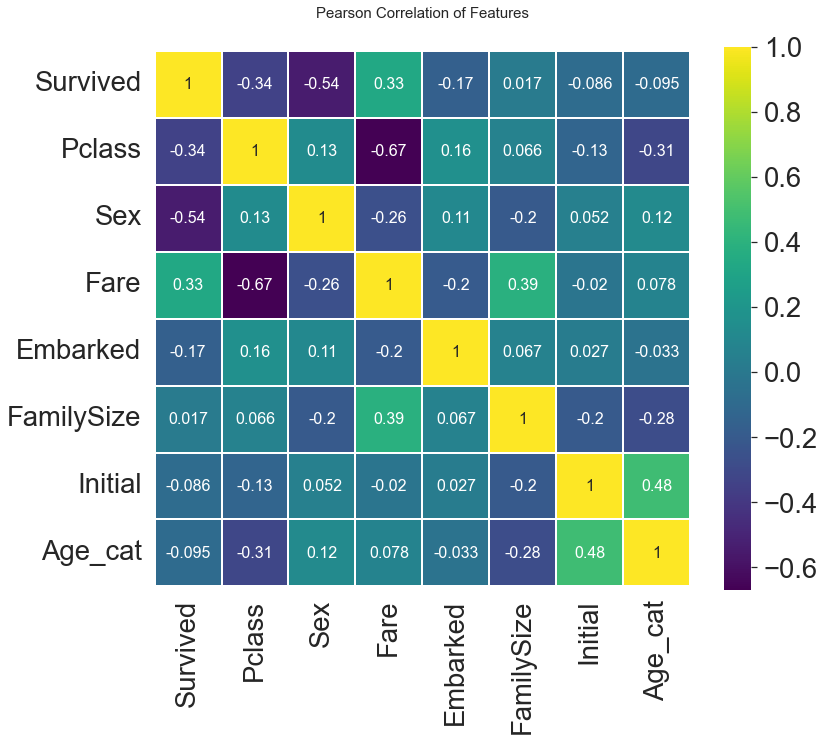

In [132]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size':16})

#파라미터를 하나씩 바꿔주며 무엇인지 공부하자
#대각요소를 제외한 1이 존재 --> 겹치는 feature가 존재한다는 뜻(여기서는 없다!)

## 3.4 One-Hot encoding on the Initial and Embarked

In [133]:
#정보가 훨씬 쉽게 표현이 된다.
#여러가지 범주가 간단한 형태로 쪼개진다.(이진 분류로 쪼개진다.)

In [134]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')
#prefix저거는 새로운 열의 이름을 어떻게 지을지 정해주는 것이다.

#이것을 쓰면 Initial을 날려준다.

In [135]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [136]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'FamilySize', 'Age_cat', 'Initial_0',
       'Initial_1', 'Initial_2', 'Initial_3', 'Initial_4', 'Embarked_0',
       'Embarked_1', 'Embarked_2'],
      dtype='object')

In [137]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

#inplace=True를 해줘야 실제 데이터에 반영이 되는 듯

In [138]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [139]:
df_test.head()

,Pclass,Sex,Fare,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,7.8292,3.0,0,0,1,0,0,0,1,0
1,3,0,7.0000,4.0,0,0,0,1,0,0,0,1
2,2,1,9.6875,6.0,0,0,1,0,0,0,1,0
3,3,1,8.6625,2.0,0,0,1,0,0,0,0,1
4,3,0,12.2875,2.0,0,0,0,1,0,0,0,1


전처리 완료!

# 4. Model development

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [141]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_train.values

In [142]:
type(X_train)

numpy.ndarray

In [143]:
X_train

array([[3.        , 1.        , 1.98100147, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.        , 4.26666208, ..., 1.        , 0.        ,
        0.        ],
       [3.        , 0.        , 2.07002232, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [3.        , 0.        , 3.15487049, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 1.        , 3.40119738, ..., 1.        , 0.        ,
        0.        ],
       [3.        , 1.        , 2.04769284, ..., 0.        , 1.        ,
        0.        ]])

In [144]:
X_train.shape

(891, 13)

In [145]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

In [146]:
X_tr.shape

(623, 13)

In [147]:
X_vld.shape

(268, 13)

In [148]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)

#default setting을 이용..

RandomForestClassifier()

In [149]:
prediction = model.predict(X_vld)
prediction

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1], dtype=int64)

In [150]:
print("총 {}명 중 {:.2f}% 정확도로 생존 맞춤".format(y_vld.shape[0], 100*metrics.accuracy_score(prediction, y_vld)))

총 268명 중 82.46% 정확도로 생존 맞춤
